In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


In [2]:
data = pd.read_csv("housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
data.dropna(inplace=True) #replaces null values and save changes
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [5]:
X = data.drop("median_house_value",axis=1)
y = data["median_house_value"]

In [6]:
# Assuming you have your features and labels in X and y respectively

# Splitting the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# test_size=0.2 means 20% of the data will be used for testing, and the remaining 80% will be used for training
# random_state=42 sets a random seed for reproducibility, so you'll get the same split if you run the code again

# Print the shapes of the resulting sets
#print("Training set shape:", X_train.shape, y_train.shape)
#print("Testing set shape:", X_test.shape, y_test.shape)

In [7]:
factored_data = X.join(y)

In [8]:
def visualizaion(data):
    data.hist(figsize=(15,8))
    plt.figure(figsize=(15,8))
    sns.heatmap(data.corr(numeric_only=True),annot=True,cmap='coolwarm')
    # Displaying the heatmap
    plt.show()
    sns.scatterplot(x='latitude',y='longitude',data=data,hue='median_house_value',palette='coolwarm')
    plt.show()


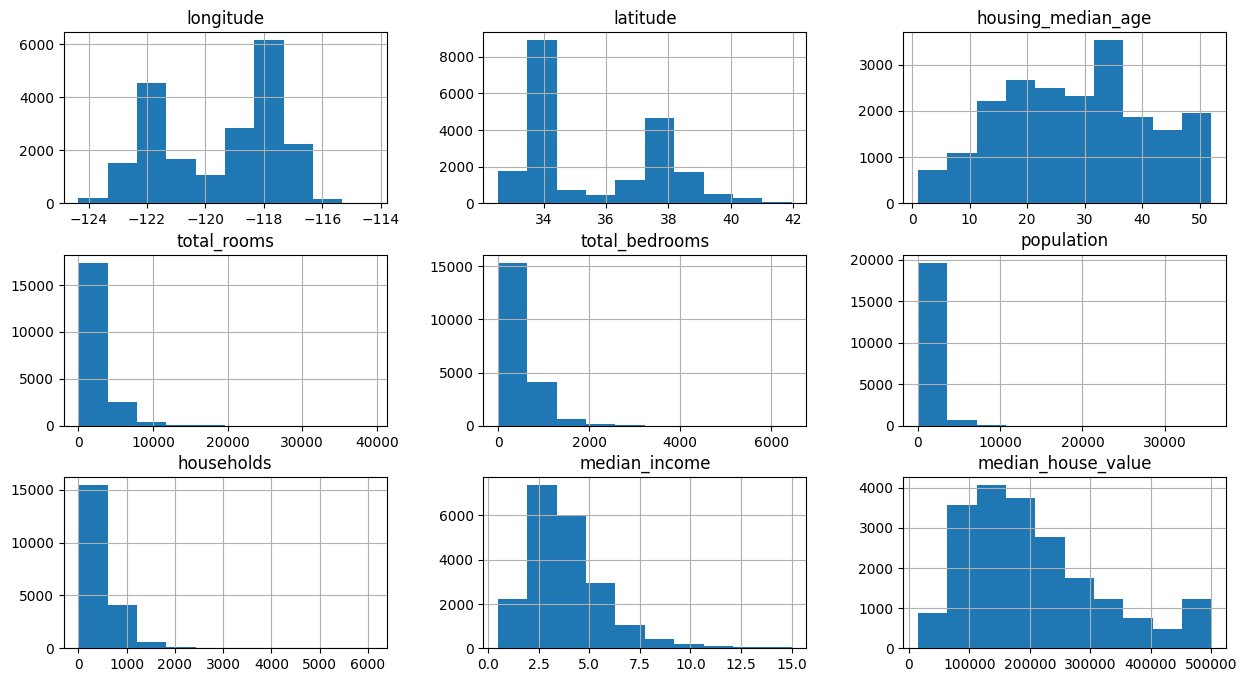

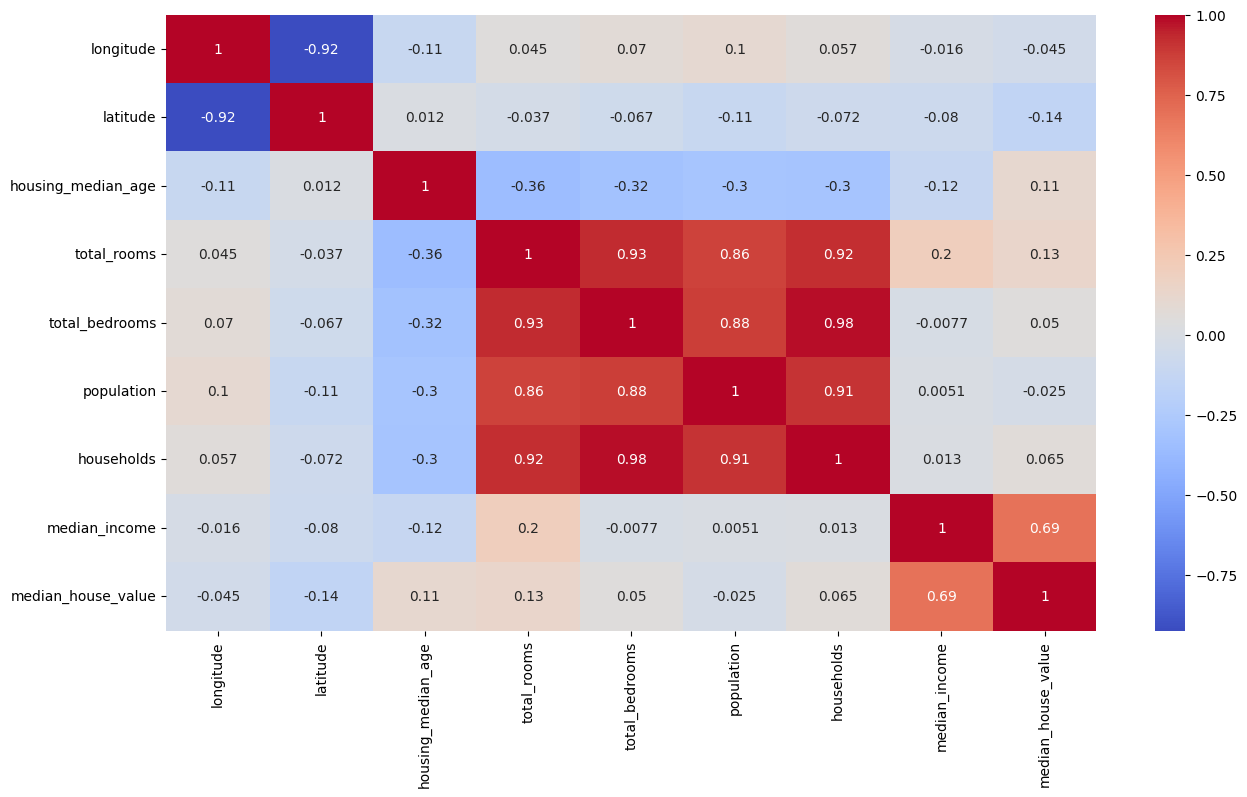

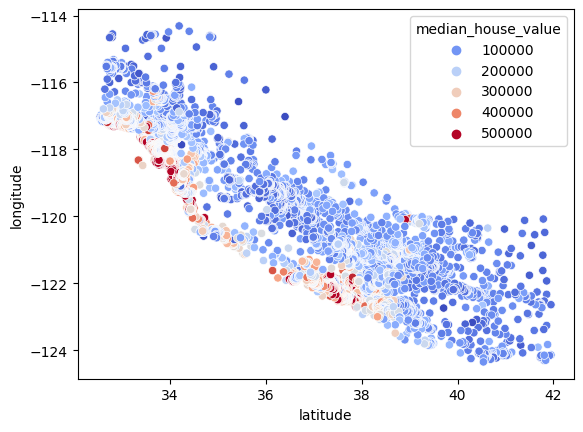

In [9]:
visualizaion(factored_data)

here we can see that income has high corelation with house value

As some of features are skewed we can use logarithmic/ sqrt /box-con/winsorization to make it more of a gaussian distribution

In [10]:
factored_data['total_rooms'] = np.log(factored_data['total_rooms']+1)
factored_data['total_bedrooms'] = np.log(factored_data['total_bedrooms']+1)
factored_data['population'] = np.log(factored_data['population']+1)
factored_data['households'] = np.log(factored_data['households']+1)

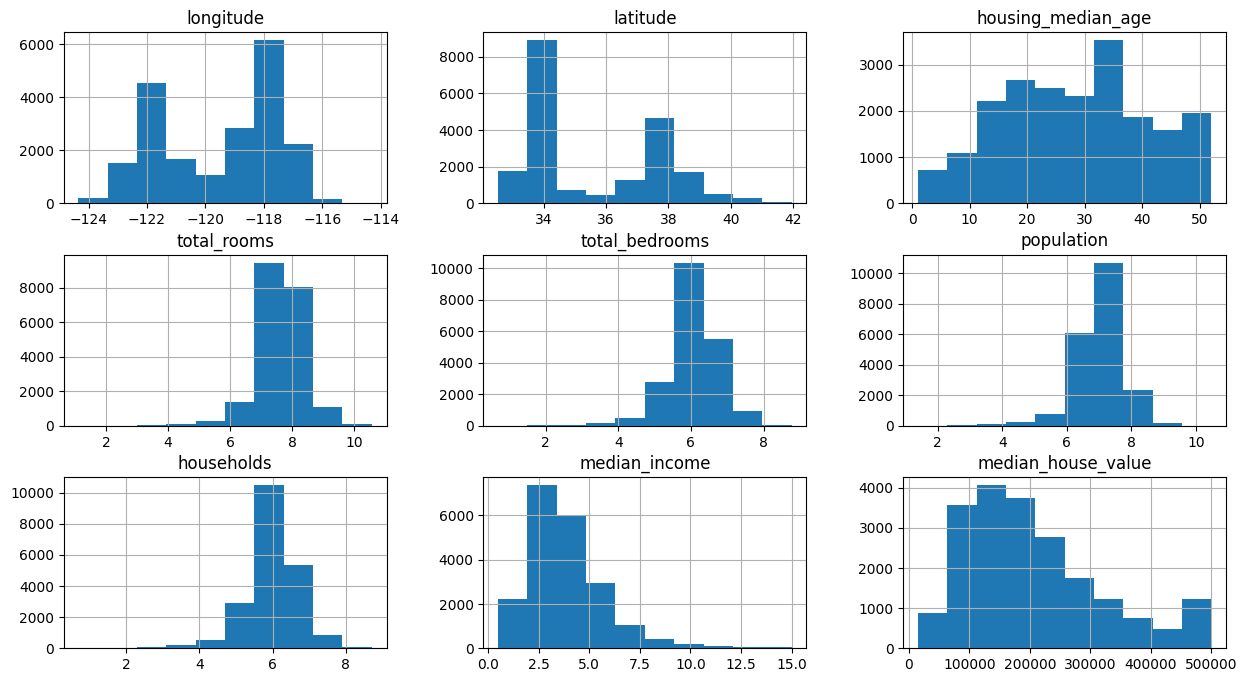

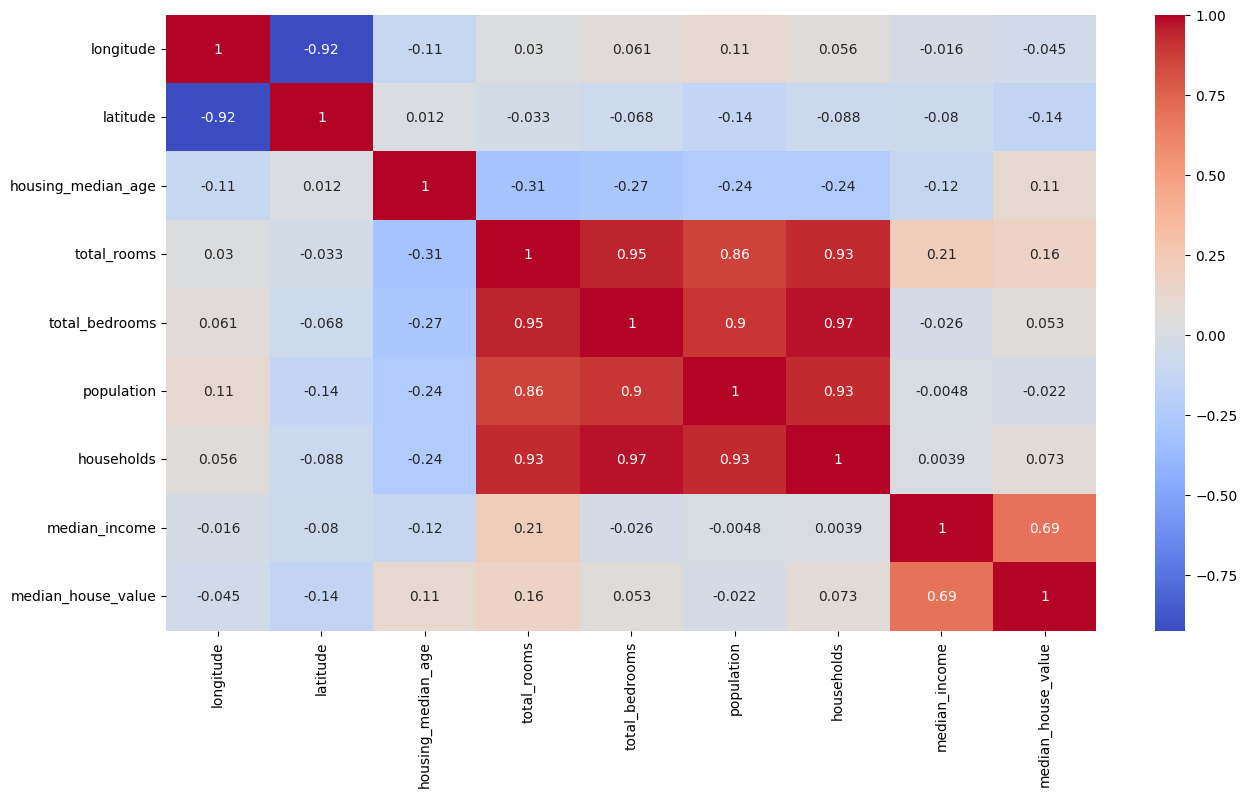

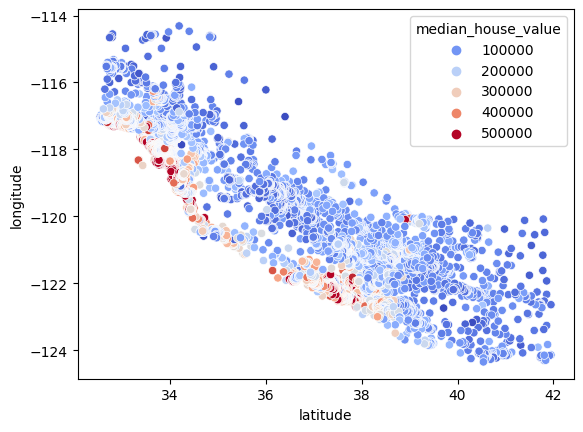

In [11]:
visualizaion(factored_data)

In [12]:
# factored_data['ocean_proximity'].value_counts()

In [13]:
hotEncoding = pd.get_dummies(factored_data['ocean_proximity'])

In [14]:
factored_data = factored_data.join(hotEncoding).drop(['ocean_proximity'],axis=1)

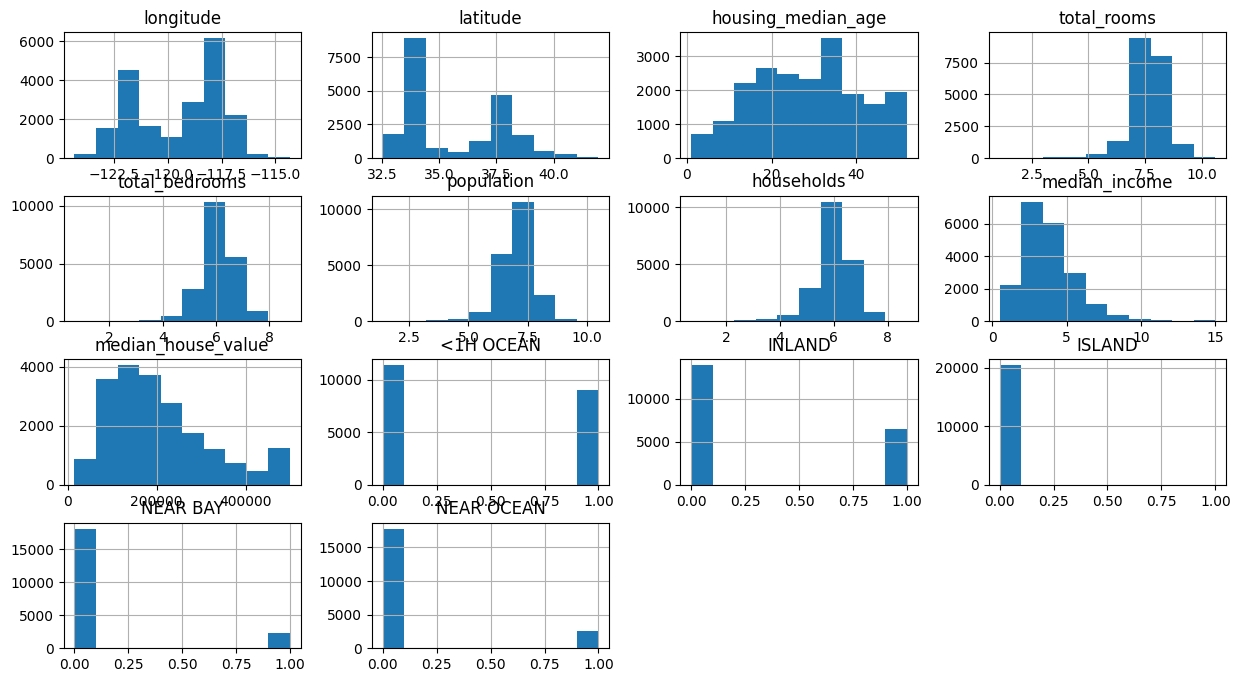

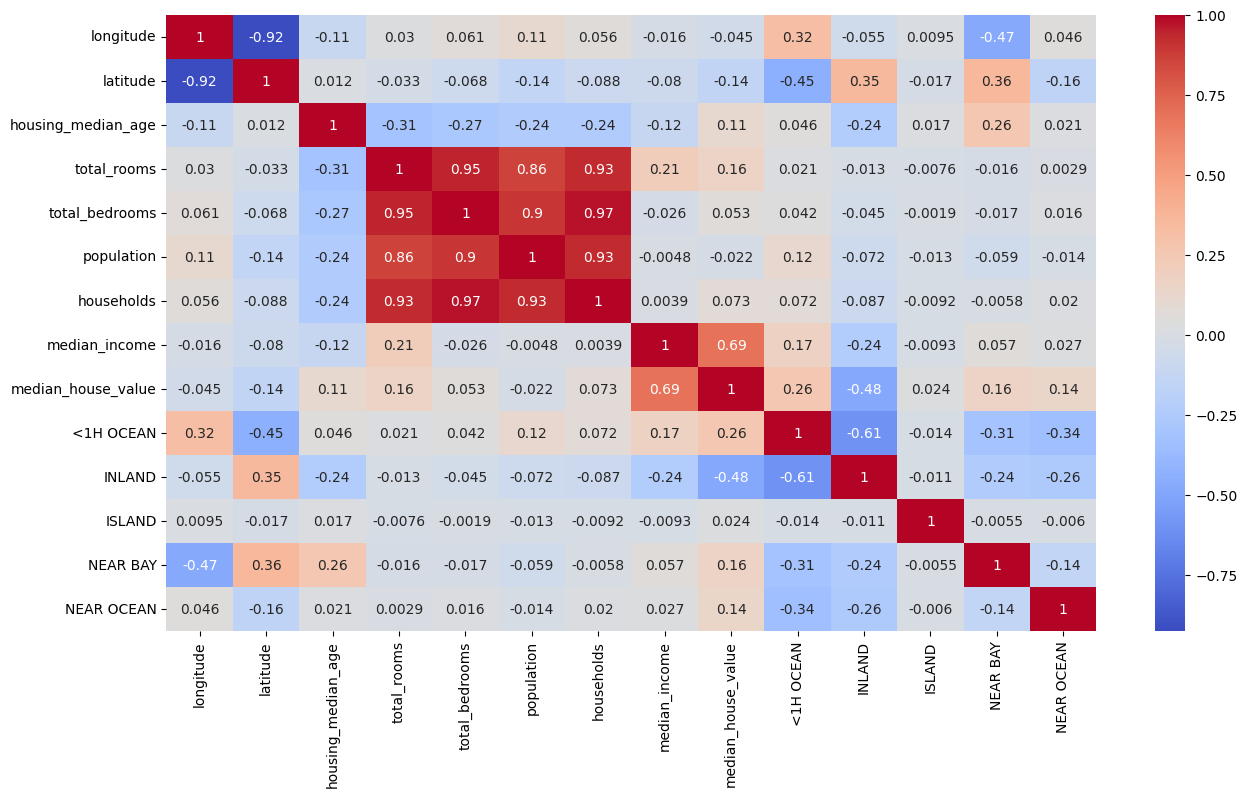

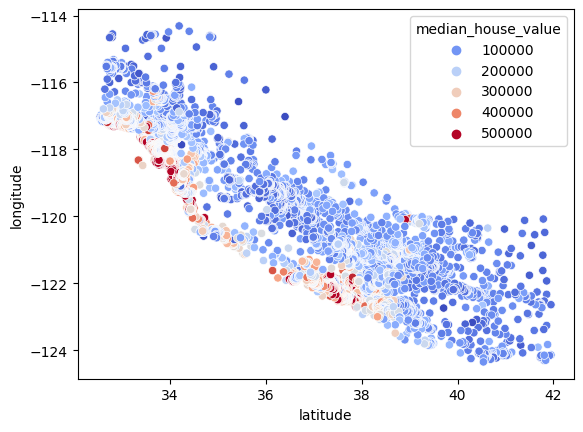

In [15]:
visualizaion(factored_data)

FEATURE ENGINEERING

We can make two new features thats bedrooms_ratio and household_rooms

In [16]:
factored_data['bedrooms_ratio']  = factored_data['total_bedrooms']/factored_data['total_rooms']
factored_data['household_rooms'] = factored_data['total_rooms'] / factored_data['households'] 

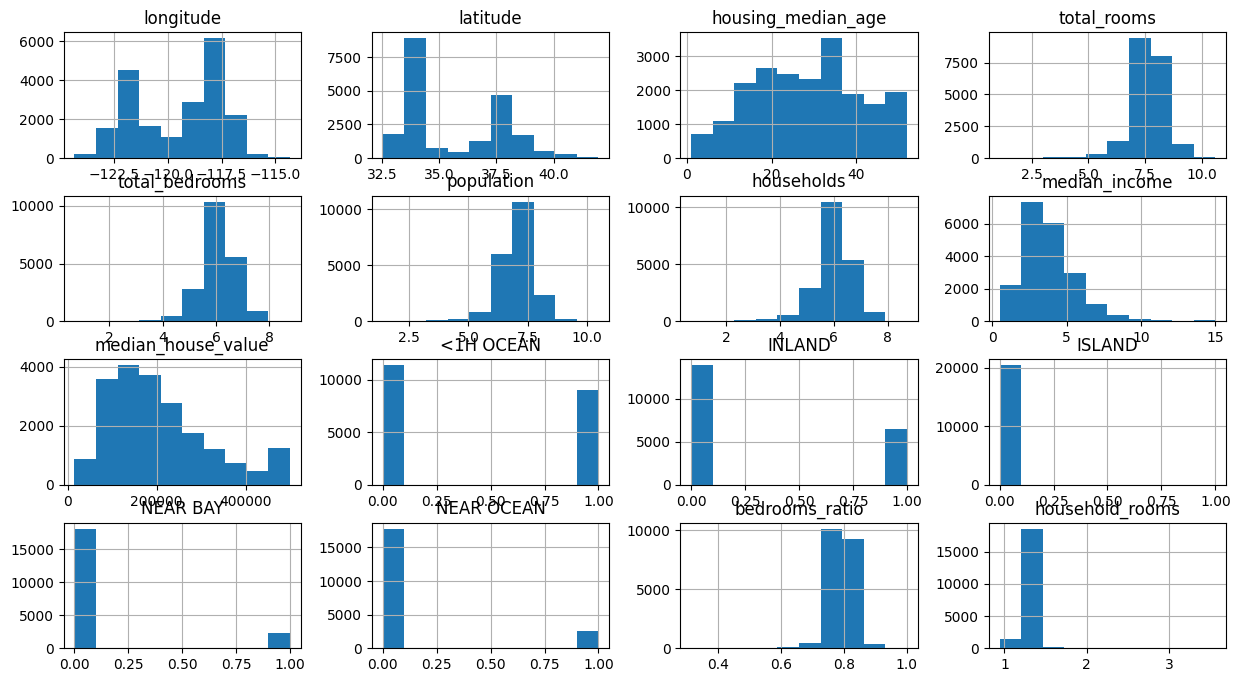

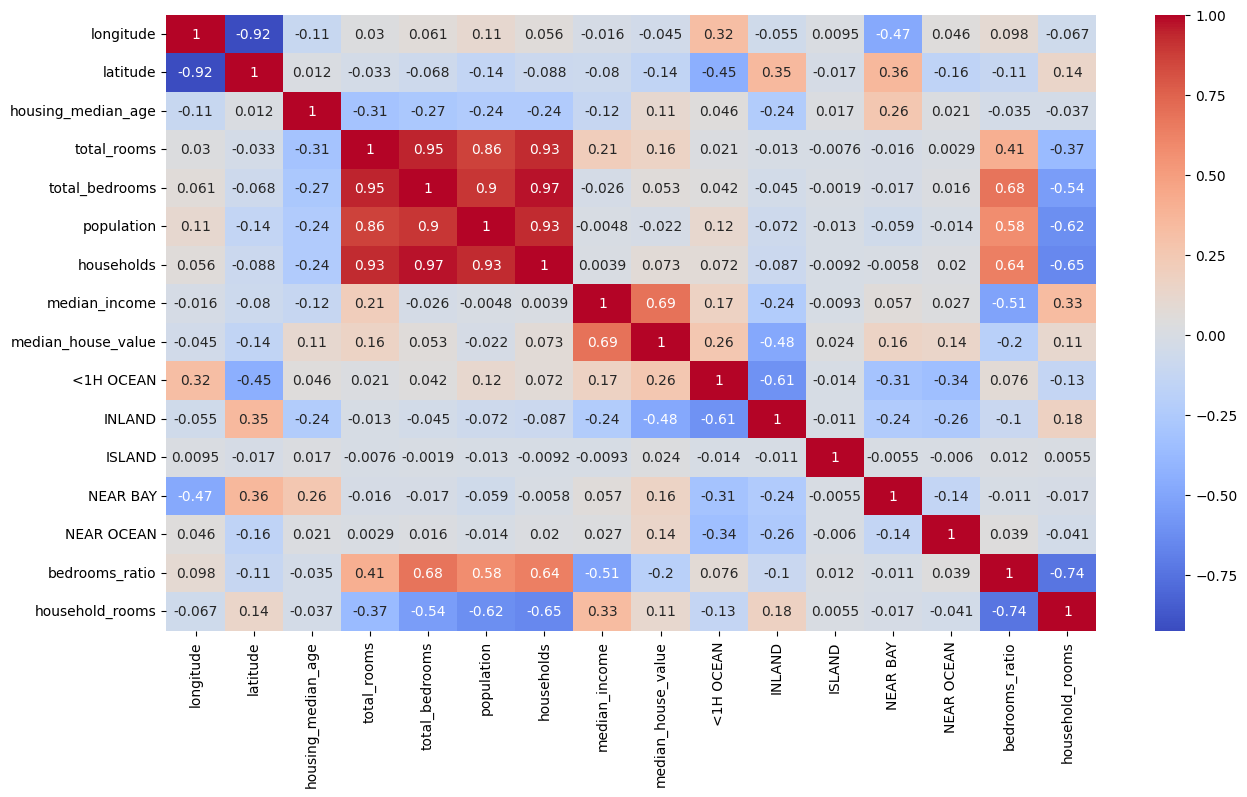

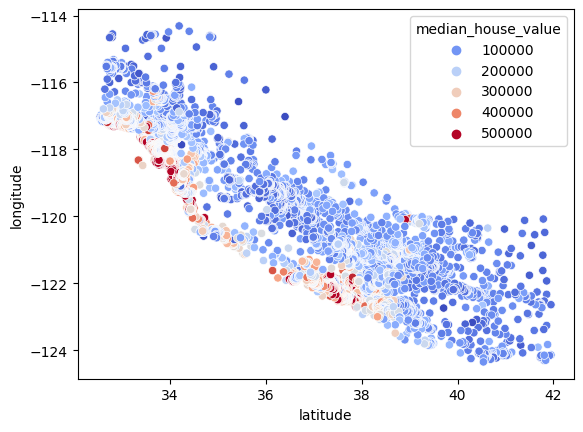

In [17]:
visualizaion(factored_data)

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

SCALING TRAIN DATA USING STANDARD SCALER OF SKLEARN

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X.drop('ocean_proximity',axis=1), y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
linear_model = LinearRegression()

linear_model.fit(X_train_scaled, y_train)
linear_model.score(X_test_scaled,y_test)

0.6400865688993735

In [21]:
#Make predictions
y_pred = linear_model.predict(X_test_scaled)

#Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("MSE",mse)

MSE 4921881237.628147


In [29]:
max_degree = 5  # Specify the maximum degree of polynomial features
from sklearn.preprocessing import PolynomialFeatures
models = []
mse_values_test = []
degrees = []
mse_values_train = []

for degree in range(1, max_degree + 1):
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    models.append((degree, model, X_test_poly))
    degrees.append(degree)

# Evaluate the models
for degree, model, X_test_poly in models:
    # y_pred_train = model.predict(X_train_poly)
    y_pred_test = model.predict(X_test_poly)
    # mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test,y_pred_test)
    mse_values_test.append(mse_test)
    # mse_values_train.append(mse_train)
    print(f"Degree {degree} - Mean Squared Error Test: {mse_test}")
print("Min value and degrees",min(mse_values_test))

Degree 1 - Mean Squared Error Test: 4921881237.628045
Degree 2 - Mean Squared Error Test: 4126489694.8033953
Degree 3 - Mean Squared Error Test: 3794689748.272563
Degree 4 - Mean Squared Error Test: 5289358530.485715
Degree 5 - Mean Squared Error Test: 396007813182.6451
Min value and degrees 3794689748.272563


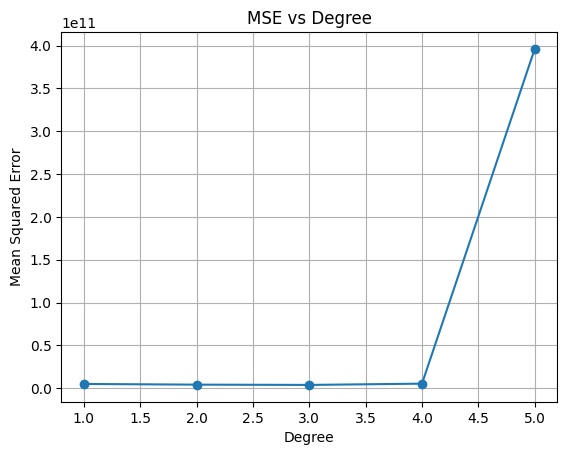

In [28]:
# Plot the MSE versus the degree
plt.plot(degrees, mse_values_test, marker='o')
plt.xlabel('Degree')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Degree')
plt.grid(True)
plt.show()

In [36]:
models[2][1].fit(X_train_scaled, y_train)
models[2][1].score(X_test_scaled,y_test)

0.6400865688993735

Lasso Regression: Lasso regression is a linear regression model with L1 regularization.

In [79]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.1)  # Specify the alpha parameter for regularization

lasso_model.fit(X_train_scaled, y_train)
lasso_model.score(X_test_scaled,y_test)

0.6400863138091224

In [80]:
#Make predictions
y_pred = lasso_model.predict(X_test_scaled)

#Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("MSE",mse)

MSE 4921884726.033449


Ridge Regression: Ridge regression is a linear regression model with L2 regularization.Can handle multicollinearity (highly correlated features) well.

In [81]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=0.1)  # Specify the alpha parameter for regularization

ridge_model.fit(X_train_scaled, y_train)
ridge_model.score(X_test_scaled,y_test)

0.6400859961576755

ElasticNet Regression: ElasticNet regression combines both L1 and L2 regularization

RANDOM FOREST

In [37]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train_scaled,y_train)
model.score(X_test_scaled,y_test)

0.8222301273450934

hyperparameters tuning

In [45]:
model = RandomForestRegressor()

param_grid={
    'n_estimators': [30,60,90],
    'max_features': [2, 4, 6,8]
}
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train_scaled, y_train)



GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [30, 60, 90]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [46]:
best_model = grid_search.best_estimator_
print(best_model)

RandomForestRegressor(max_features=6, n_estimators=90)


In [47]:
best_model.score(X_test_scaled,y_test)

0.8241613518404126

XGBoost Regressor

In [51]:
from xgboost import XGBRegressor

In [53]:
XGB_model = XGBRegressor()
XGB_model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [55]:
y_pred = XGB_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print(XGB_model.score(X_test_scaled,y_test))

Mean Squared Error: 28755026824.513634
0.8243447823605674
